In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [2]:
data = np.load("../my_comp_train_XY.npz")
X = data["X"]
y = data["y"]

## Split train and test data

In [3]:
X = X.reshape(X.shape[0], -1)
# split train and test data(ratio 0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [4]:
# X_data 0 to 1 scaled
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

## Classification

### Random Forest

In [5]:
rnd_clf = RandomForestClassifier(verbose=2)
rnd_clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   37.7s finished


RandomForestClassifier(verbose=2)

In [6]:
# accuracy score
y_pred_rnd = rnd_clf.predict(X_train_scaled)
accuracy_score_rnd_train = accuracy_score(y_pred_rnd, y_train)
print(accuracy_score_rnd_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [7]:
# confusion matrix value
matric_rnd_train = confusion_matrix(y_train, y_pred_rnd)
matric_rnd_train

array([[3317,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2697,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4289,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 3923,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3271,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2602,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4261,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4009,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4681,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3331]],
      dtype=int64)

### Random Forest with Cross-validation

In [8]:
# Random Forest with cross validation
rnd_clf = RandomForestClassifier()
cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.95794508, 0.95761524, 0.9608312 ])

In [9]:
# accuracy score
y_pred_rnd_cv = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)
accuracy_score_rnd_train = accuracy_score(y_pred_rnd_cv, y_train)
print(accuracy_score_rnd_train)

0.9594568593496605


In [10]:
# confusion matrix value
matric_rnd_train_cv = confusion_matrix(y_train, y_pred_rnd_cv)
matric_rnd_train_cv

array([[3255,    1,    9,    3,    2,    3,   18,    0,   24,    2],
       [   0, 2642,   19,    9,    4,    1,    5,    7,    7,    3],
       [  18,    3, 4150,   19,   21,    2,   19,   25,   29,    3],
       [   5,    3,   81, 3683,    4,   29,   11,   32,   56,   19],
       [  11,    6,    8,    1, 3135,    0,   18,    8,   11,   73],
       [  16,    5,    5,   61,    8, 2416,   31,    5,   38,   17],
       [  15,    5,    4,    0,    7,   15, 4188,    0,   27,    0],
       [   4,   13,   39,    7,   21,    0,    0, 3861,   13,   51],
       [  13,   14,   32,   28,   18,   19,   26,    3, 4485,   43],
       [  11,    6,   17,   51,   70,   10,    3,   36,   36, 3091]],
      dtype=int64)

<AxesSubplot:>

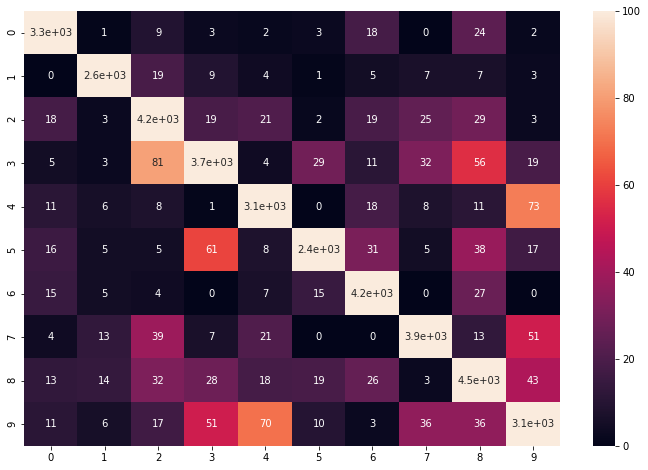

In [11]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_rnd_train_cv, annot=True, vmin=0, vmax=100)

In [85]:
# evaluate with test data
y_pred_test0 = rnd_clf.predict(X_test_scaled)
# accuracy score
accuracy_score_rnd_test0 = accuracy_score(y_pred_test0, y_test)
print(accuracy_score_rnd_test0)

0.9628408091468778


In [86]:
# confusion matrix value
matric_rnd_test0 = confusion_matrix(y_test, y_pred_test0)
matric_rnd_test0

array([[ 807,    0,    3,    1,    3,    1,    4,    1,    8,    1],
       [   0,  657,    6,    1,    2,    1,    2,    1,    3,    1],
       [   5,    3, 1028,    8,   11,    0,    3,    3,   12,    0],
       [   3,    1,   12,  937,    0,    8,    0,    8,    8,    4],
       [   0,    2,    3,    0,  785,    0,    8,    2,    5,   13],
       [   1,    0,    1,   11,    1,  615,    5,    2,   11,    3],
       [   4,    0,    1,    0,    2,    3, 1049,    0,    6,    0],
       [   0,    3,    8,    0,    5,    0,    0,  974,    3,   10],
       [   1,    9,    8,    8,    4,    5,    5,    1, 1114,   15],
       [   3,    0,    1,    8,   10,    3,    0,   10,    6,  792]],
      dtype=int64)

<AxesSubplot:>

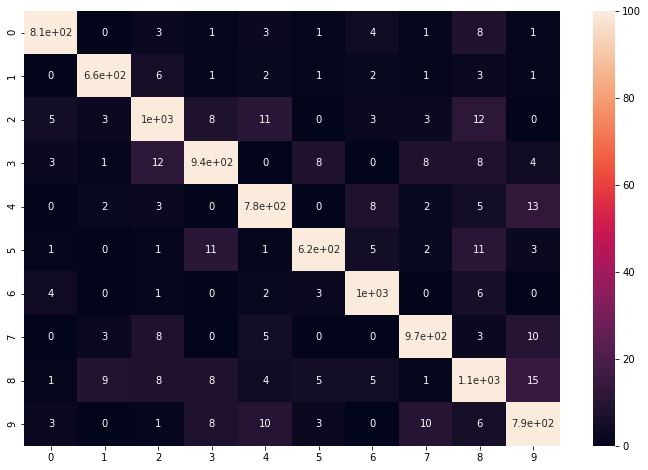

In [87]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_rnd_test0, annot=True, vmin=0, vmax=100)

## Hyper parameter tuning with Random Forest

In [14]:
rnd_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
# split train and valid data(ratio 0.8:0.2)
X_train_for_hp, X_valid, y_train_for_hp, y_valid = train_test_split(
    X_train_scaled, y_train, test_size=0.2, stratify=y_train)

## change n estimator

observe overfitting with accuracy score of valid data

In [66]:
# n estimator parameter
n_estimators = np.arange(1,201,5)

train_accuracy_list1 = []
valid_accuracy_list1 = []
for n_estimator in n_estimators:
    rnd_clf = RandomForestClassifier(n_estimators=n_estimator)
    rnd_clf.fit(X_train_for_hp, y_train_for_hp)
    y_pred_train = rnd_clf.predict(X_train_for_hp)
    # accuracy score in train data
    accuracy_score_rnd_train = accuracy_score(y_pred_train, y_train_for_hp)
    
    train_accuracy_list1.append(accuracy_score_rnd_train)
    y_pred_valid = rnd_clf.predict(X_valid)
    # accuracy score in valid data(no trained)
    accuracy_score_rnd_valid = accuracy_score(y_pred_valid, y_valid)
    
    valid_accuracy_list1.append(accuracy_score_rnd_valid)

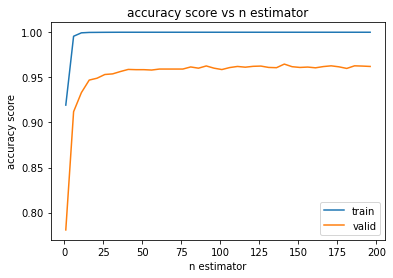

In [67]:
plt.figure()
plt.title("accuracy score vs n estimator")
plt.plot(n_estimators, train_accuracy_list1, label="train")
plt.plot(n_estimators, valid_accuracy_list1, label="valid")
plt.xlabel("n estimator")
plt.ylabel("accuracy score")
plt.legend()

(0.9, 1.0)

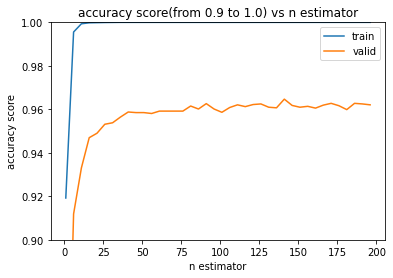

In [68]:
plt.figure()
plt.title("accuracy score(from 0.9 to 1.0) vs n estimator")
plt.plot(n_estimators, train_accuracy_list1, label="train")
plt.plot(n_estimators, valid_accuracy_list1, label="valid")
plt.xlabel("n estimator")
plt.ylabel("accuracy score")
plt.legend()
plt.ylim(0.9, 1.0)

In [69]:
# n estimator maximize accuracy score of valid data
n_estimators_best_index = np.argmax(np.array(valid_accuracy_list1))
n_estimators_best = n_estimators[n_estimators_best_index]
n_estimators_best

141

## change max depth

observe overfitting with accuracy score of valid data

In [42]:
# max depth parameter
max_depths = np.arange(1,30)

train_accuracy_list2 = []
valid_accuracy_list2 = []
for max_depth in max_depths:
    rnd_clf = RandomForestClassifier(n_estimators=n_estimator_best,
                                    max_depth=max_depth)
    rnd_clf.fit(X_train_for_hp, y_train_for_hp)
    y_pred_train = rnd_clf.predict(X_train_for_hp)
    # accuracy score in train data
    accuracy_score_rnd_train = accuracy_score(y_pred_train, y_train_for_hp)
    
    train_accuracy_list2.append(accuracy_score_rnd_train)
    y_pred_valid = rnd_clf.predict(X_valid)
    # accuracy score in valid data(no trained)
    accuracy_score_rnd_valid = accuracy_score(y_pred_valid, y_valid)
    
    valid_accuracy_list2.append(accuracy_score_rnd_valid)

Text(0, 0.5, 'accuracy score')

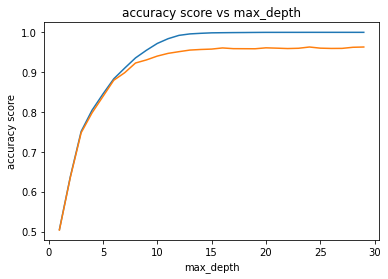

In [43]:
plt.figure()
plt.title("accuracy score vs max_depth")
plt.plot(max_depths, train_accuracy_list2, label="train")
plt.plot(max_depths, valid_accuracy_list2, label="valid")
plt.xlabel("max_depth")
plt.ylabel("accuracy score")

(0.9, 1.0)

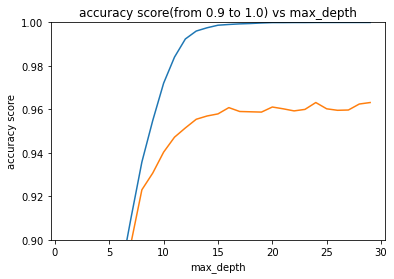

In [44]:
plt.figure()
plt.title("accuracy score(from 0.9 to 1.0) vs max_depth")
plt.plot(max_depths, train_accuracy_list2, label="train")
plt.plot(max_depths, valid_accuracy_list2, label="valid")
plt.xlabel("max_depth")
plt.ylabel("accuracy score")
plt.ylim(0.9, 1)

In [45]:
# max_depth maximize accuracy score of valid data
max_depth_best = np.argmax(np.array(valid_accuracy_list2))
max_depth_best

23

## Random Forest with grid search

hyper parameter tuning near best the best param

In [71]:
# Random Forest with grid search
param_grid = [
    {"n_estimators": [41, 91, 141, 201],
     "max_depth": [15, 19, 23, 27, 30]}
]

rnd_clf_best_param = RandomForestClassifier()
rnd_clf_gs = GridSearchCV(rnd_clf_best_param, param_grid, verbose=2, cv=5)
rnd_clf_gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ......................max_depth=15, n_estimators=41; total time=  12.0s
[CV] END ......................max_depth=15, n_estimators=41; total time=  11.3s
[CV] END ......................max_depth=15, n_estimators=41; total time=  11.8s
[CV] END ......................max_depth=15, n_estimators=41; total time=  11.7s
[CV] END ......................max_depth=15, n_estimators=41; total time=  11.6s
[CV] END ......................max_depth=15, n_estimators=91; total time=  26.0s
[CV] END ......................max_depth=15, n_estimators=91; total time=  27.3s
[CV] END ......................max_depth=15, n_estimators=91; total time=  28.2s
[CV] END ......................max_depth=15, n_estimators=91; total time=  25.7s
[CV] END ......................max_depth=15, n_estimators=91; total time=  31.8s
[CV] END .....................max_depth=15, n_estimators=141; total time=  43.8s
[CV] END .....................max_depth=15, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [15, 19, 23, 27, 30],
                          'n_estimators': [41, 91, 141, 201]}],
             verbose=2)

In [72]:
rnd_clf_gs.cv_results_

{'mean_fit_time': array([11.57445865, 27.44411459, 54.44535632, 74.63164372, 17.34267383,
        34.34540105, 45.42537265, 60.6975152 , 12.3027566 , 28.97180791,
        43.60353513, 62.17759814, 12.33008938, 27.21025419, 41.88196325,
        62.63137765, 12.78546238, 28.67723608, 42.69570255, 61.50760212]),
 'std_fit_time': array([ 0.25750923,  2.12799919, 12.1213184 , 10.24687262,  3.28260496,
         8.04177826,  1.66420606,  3.06020009,  0.25984424,  2.3478396 ,
         2.72076883,  5.38187264,  0.47397395,  1.21509704,  1.54236614,
         4.59024052,  0.44135494,  2.20699525,  1.84963542,  3.26587961]),
 'mean_score_time': array([0.19626513, 0.43976912, 0.8665359 , 1.07615938, 0.24678879,
        0.48749642, 0.66243987, 0.93198562, 0.20585337, 0.40773692,
        0.65913296, 0.91788621, 0.21420913, 0.41418667, 0.65277209,
        0.91523457, 0.22060428, 0.42633672, 0.67359238, 0.92319231]),
 'std_score_time': array([0.00314776, 0.0620081 , 0.2533263 , 0.16783874, 0.02854652,


In [73]:
# params vs accuracy
params = rnd_clf_gs.cv_results_['params']
accuracy_list = rnd_clf_gs.cv_results_['mean_test_score']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["acc"] = accuracy
    result_list.append(param)

In [74]:
result_list

[{'max_depth': 15, 'n_estimators': 41, 'acc': 0.9561309276978994},
 {'max_depth': 15, 'n_estimators': 91, 'acc': 0.9585222835652223},
 {'max_depth': 15, 'n_estimators': 141, 'acc': 0.9593194626249437},
 {'max_depth': 15, 'n_estimators': 201, 'acc': 0.960281473034812},
 {'max_depth': 19, 'n_estimators': 41, 'acc': 0.9558010156938241},
 {'max_depth': 19, 'n_estimators': 91, 'acc': 0.9614359044133041},
 {'max_depth': 19, 'n_estimators': 141, 'acc': 0.9611884779649076},
 {'max_depth': 19, 'n_estimators': 201, 'acc': 0.9622605559942714},
 {'max_depth': 23, 'n_estimators': 41, 'acc': 0.9570380535025557},
 {'max_depth': 23, 'n_estimators': 91, 'acc': 0.9610785727706028},
 {'max_depth': 23, 'n_estimators': 141, 'acc': 0.9620680557017174},
 {'max_depth': 23, 'n_estimators': 201, 'acc': 0.9630576217340922},
 {'max_depth': 27, 'n_estimators': 41, 'acc': 0.957697650870905},
 {'max_depth': 27, 'n_estimators': 91, 'acc': 0.9598966235429044},
 {'max_depth': 27, 'n_estimators': 141, 'acc': 0.962040613

In [75]:
df_result_list = pd.DataFrame(result_list)
df_result_list

,max_depth,n_estimators,acc
0,15,41,0.956131
1,15,91,0.958522
2,15,141,0.959319
3,15,201,0.960281
4,19,41,0.955801
5,19,91,0.961436
6,19,141,0.961188
7,19,201,0.962261
8,23,41,0.957038
9,23,91,0.961079


<AxesSubplot:xlabel='max_depth', ylabel='acc'>

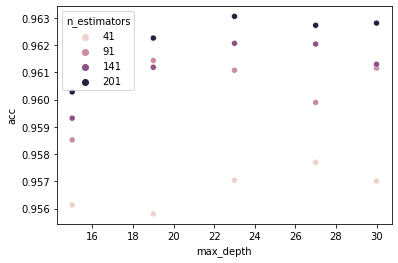

In [76]:
# plot params vs accuracy
sns.scatterplot(data=df_result_list, x="max_depth", y="acc", hue="n_estimators")

In [77]:
# accuracy score
y_pred_rnd_clf_cv = cross_val_predict(rnd_clf_gs.best_estimator_, X_train_scaled, y_train, cv=3)
accuracy_score_rnd_clf_train = accuracy_score(y_pred_rnd_clf_cv, y_train)
print(accuracy_score_rnd_clf_train)

0.9596767543497979


In [78]:
# confusion matrix value
matric_rnd_clf_train_cv = confusion_matrix(y_train, y_pred_rnd_clf_cv)
matric_rnd_clf_train_cv

array([[3255,    1,    8,    2,    2,    5,   16,    0,   28,    0],
       [   0, 2644,   16,   10,    3,    0,   10,    5,    6,    3],
       [  19,    5, 4144,   19,   21,    2,   18,   27,   29,    5],
       [   5,    3,   65, 3689,    5,   30,   10,   37,   62,   17],
       [   7,    5,    8,    1, 3127,    0,   21,    9,   11,   82],
       [  15,    7,    7,   52,    8, 2433,   26,    6,   33,   15],
       [  21,    5,    3,    0,    6,   18, 4182,    0,   26,    0],
       [   3,   18,   46,    3,   26,    0,    0, 3845,   13,   55],
       [   8,   12,   34,   24,   20,   17,   28,    5, 4489,   44],
       [   8,    5,   11,   50,   57,   14,    3,   37,   40, 3106]],
      dtype=int64)

<AxesSubplot:>

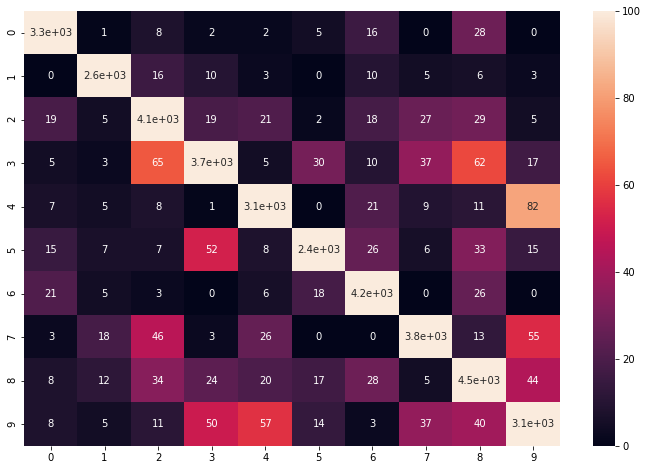

In [79]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_rnd_clf_train_cv, annot=True, vmin=0, vmax=100)

## Evaluate Random Forest model with test data

In [80]:
# evaluate with test data
y_pred_test = rnd_clf_gs.best_estimator_.predict(X_test_scaled)
# accuracy score
accuracy_score_rnd_test = accuracy_score(y_pred_test, y_test)
print(accuracy_score_rnd_test)

0.966358839050132


In [82]:
# confusion matrix value
matric_rnd_clf_test = confusion_matrix(y_test, y_pred_test)
matric_rnd_clf_test

array([[ 810,    0,    1,    1,    2,    2,    5,    1,    7,    0],
       [   0,  659,    6,    1,    2,    1,    2,    1,    2,    0],
       [   5,    2, 1035,    6,    7,    0,    4,    5,    9,    0],
       [   2,    1,   13,  939,    0,    7,    0,    8,    8,    3],
       [   0,    2,    3,    0,  788,    0,    6,    3,    6,   10],
       [   1,    0,    1,   10,    2,  615,    7,    1,    8,    5],
       [   3,    1,    1,    0,    2,    2, 1052,    0,    4,    0],
       [   0,    3,    7,    0,    4,    0,    0,  975,    2,   12],
       [   2,    7,    9,    6,    3,    4,    5,    2, 1121,   11],
       [   3,    0,    2,    8,    8,    2,    0,    8,    6,  796]],
      dtype=int64)

<AxesSubplot:>

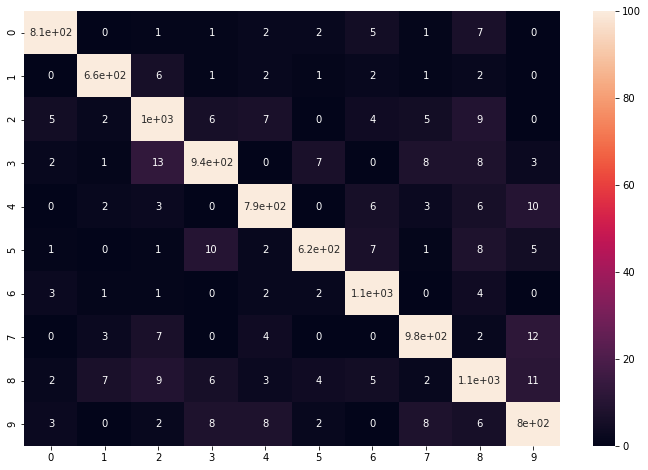

In [83]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_rnd_clf_test, annot=True, vmin=0, vmax=100)

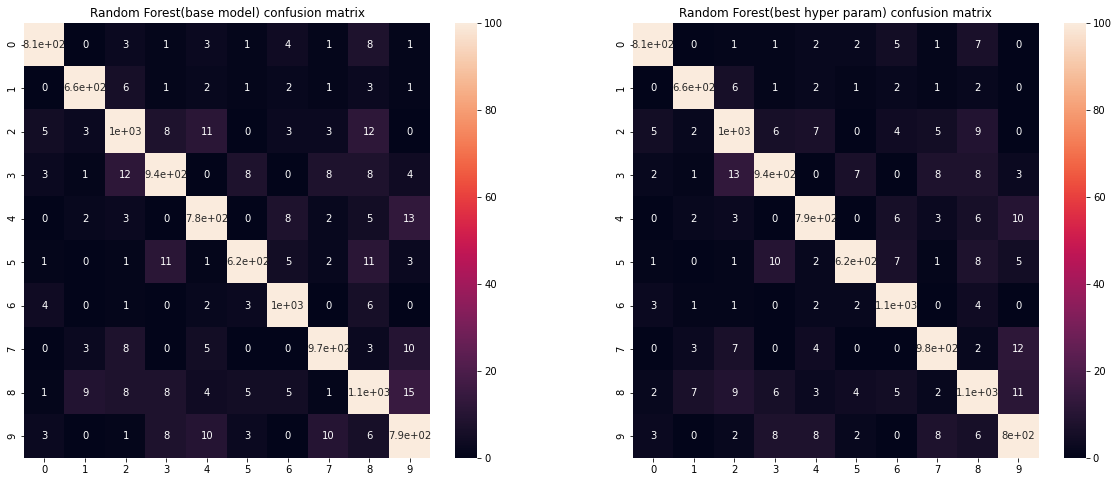

In [88]:
# compare confusion matrix between base model and best hyperparam model
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

map_min, map_max = 0, 100
sns.heatmap(matric_rnd_test0, annot=True, vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matric_rnd_clf_test, annot=True, vmin=map_min, vmax=map_max, ax=axs[1])
axs[0].set_title("Random Forest(base model) confusion matrix")
axs[1].set_title("Random Forest(best hyper param) confusion matrix")
plt.show()

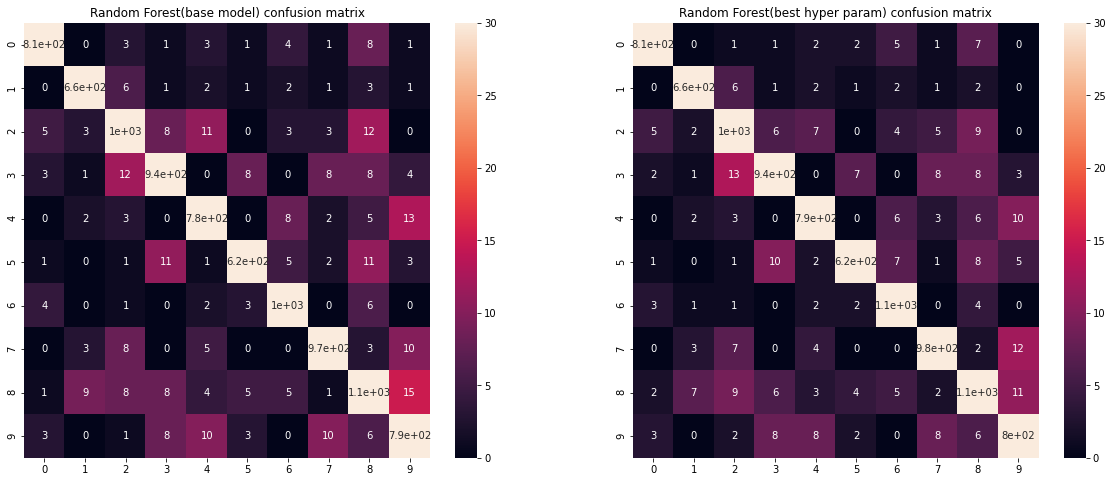

In [90]:
# compare confusion matrix between base model and best hyperparam model
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

map_min, map_max = 0, 30
sns.heatmap(matric_rnd_test0, annot=True, vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matric_rnd_clf_test, annot=True, vmin=map_min, vmax=map_max, ax=axs[1])
axs[0].set_title("Random Forest(base model) confusion matrix")
axs[1].set_title("Random Forest(best hyper param) confusion matrix")
plt.show()